In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data[' timedelta'].unique().shape # 

(724,)

###URL and timedelta has non predictor variable

In [4]:
data.drop(labels=['url',' timedelta'],axis=1,inplace=True) 

In [5]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
data.columns=data.columns.str.replace(' ','') # arrange columns names in correct way

In [7]:
data.shape

(39644, 59)

In [8]:
data[data['n_tokens_content']==0].shape # no of words are zero , it is noise

(1181, 59)

In [9]:
newdata=data[data['n_tokens_content']!=0]
newdata.shape

(38463, 59)

In [10]:
newdata['n_unique_tokens']=newdata['n_unique_tokens'].replace(701,np.nan) #one value has greater than 1
newdata.dropna(inplace=True)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
newdata['n_non_stop_words']=newdata['n_non_stop_words'].replace(1042,np.nan)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
newdata.dropna(inplace=True)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
newdata.shape

(38462, 59)

In [14]:
def fun(x):
    if (x>=1400):
        return ('popular')
    else :
        return ("unpopular")
newdata['popularity']=newdata['shares'].apply(lambda x:fun(x))

C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
newdata['popularity']=newdata['popularity'].map({'popular':1,'unpopular':0})

C:\Users\Ajay singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
newdata.drop('shares',axis=1,inplace=True)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


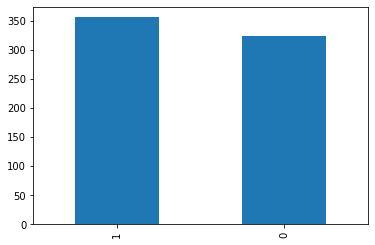

In [17]:
newdata[newdata['title_sentiment_polarity']<-0.5]['popularity'].value_counts().plot(kind='bar')


In [90]:
print(newdata[(newdata['title_sentiment_polarity']>-1)&(newdata['title_sentiment_polarity']<0)]['popularity'].value_counts())


0    2807
1    2605
Name: popularity, dtype: int64


In [91]:
print(newdata[(newdata['title_sentiment_polarity']<1)&(newdata['title_sentiment_polarity']>0)]['popularity'].value_counts(1))


1    0.55796
0    0.44204
Name: popularity, dtype: float64


In [92]:
newdata[newdata['title_sentiment_polarity']==0]['popularity'].value_counts()

1    10191
0     9226
Name: popularity, dtype: int64

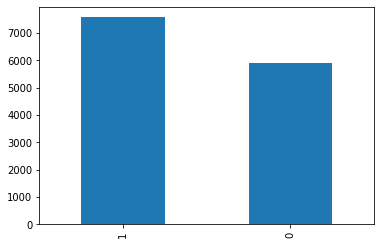

In [142]:
newdata[newdata['title_sentiment_polarity']>0]['popularity'].value_counts().plot(kind='bar')

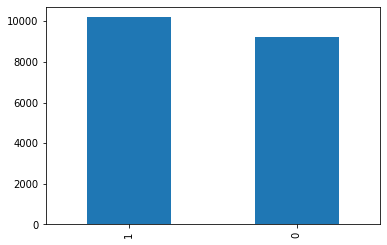

In [143]:
newdata[newdata['title_sentiment_polarity']==0]['popularity'].value_counts().plot(kind='bar')

# Checking by log transformation

In [93]:
newdata.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [18]:
dew=newdata.copy()

In [19]:
dew['kw_max_max']=np.sqrt(dew['kw_max_max'])
dew['num_videos']=np.sqrt(dew['num_videos'])
dew['num_imgs']=np.sqrt(dew['num_imgs'])
dew['n_tokens_content']=np.sqrt(dew['n_tokens_content'])
dew['num_hrefs']=np.sqrt(dew['num_hrefs'])
dew['num_self_hrefs']=np.sqrt(dew['num_self_hrefs'])
dew['kw_max_max']=np.sqrt(dew['kw_max_min'])
dew['kw_min_max']=np.sqrt(dew['kw_min_max'])
dew['kw_max_max']=np.sqrt(dew['kw_max_max'])
dew['kw_avg_max']=np.sqrt(dew['kw_avg_max'])
dew['kw_min_avg']=np.sqrt(dew['kw_min_avg'])
dew['kw_max_avg']=np.sqrt(dew['kw_max_avg'])
dew['kw_avg_avg']=np.sqrt(dew['kw_avg_avg'])

In [20]:
dew.dropna(inplace=True)

In [122]:
from sklearn.model_selection import train_test_split
X=dew.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=dew['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing with outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(newdata.shape)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(38462, 59)
train score  0.6587168914149857
test score 0.6566129311839141
accuracy score 0.6566129311839141


In [123]:
from sklearn.model_selection import train_test_split
X=dew.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=dew['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing with outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8)
modelrfp=rfp.fit(X_train,y_train) # from removing of ourlier
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6632865314612585
0.31791952073215834
0.7019562715765247


In [124]:

newX=dew[['n_tokens_title', 'n_tokens_content','num_hrefs',
       'num_self_hrefs', 'num_imgs','num_keywords','data_channel_is_entertainment','data_channel_is_socmed'
        ,'data_channel_is_tech','data_channel_is_world', 'kw_min_min','kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','weekday_is_tuesday',
       'weekday_is_wednesday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02','LDA_04']]

from sklearn.model_selection import train_test_split
y=dew['popularity']
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaleXtrain=sc.fit_transform(X_train)

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=800,criterion='entropy')
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6697867914716589
0.33338919790305876
0.7008010051829746


#### EDA

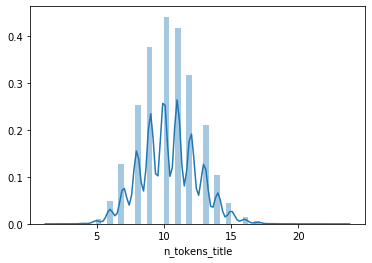

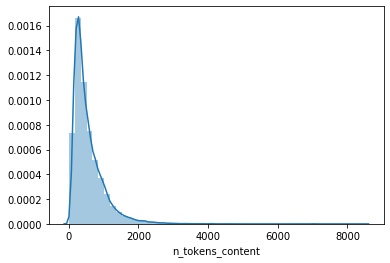

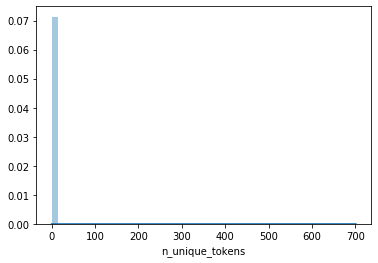

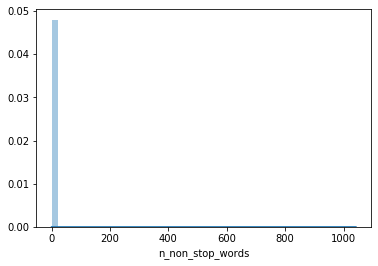

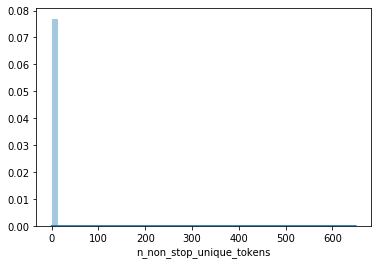

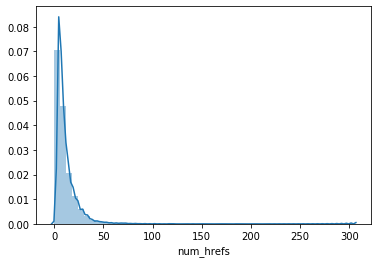

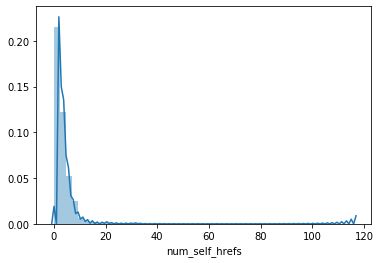

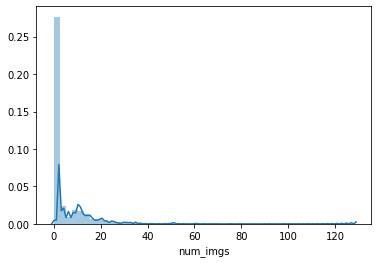

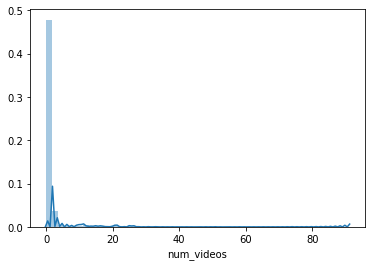

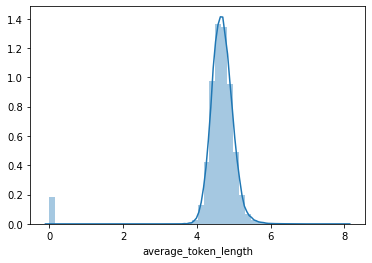

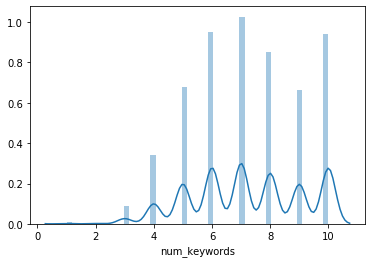

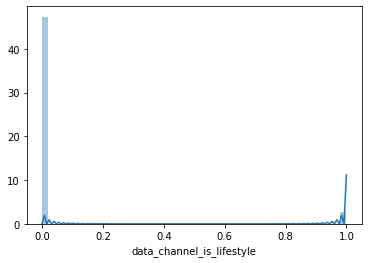

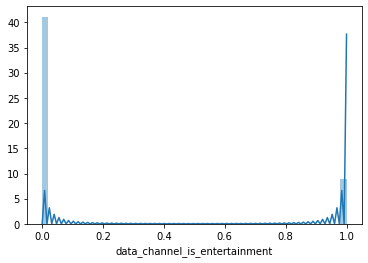

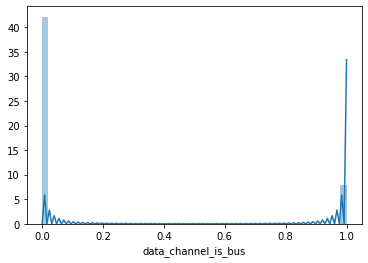

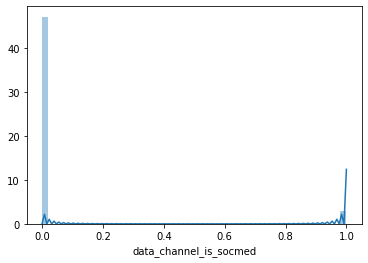

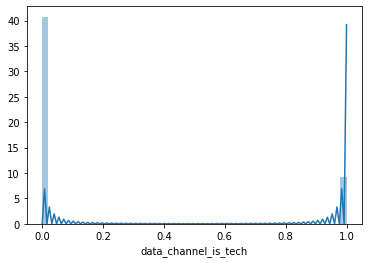

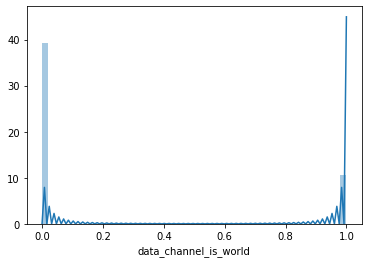

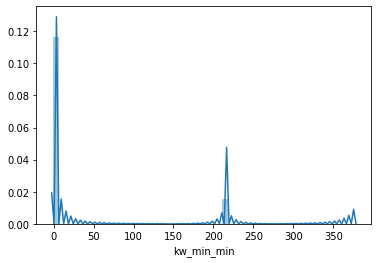

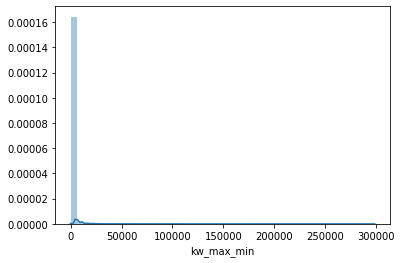

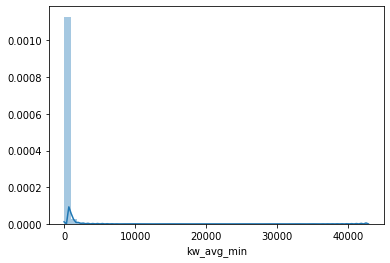

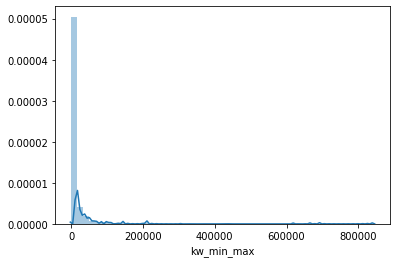

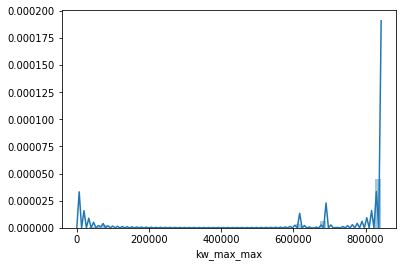

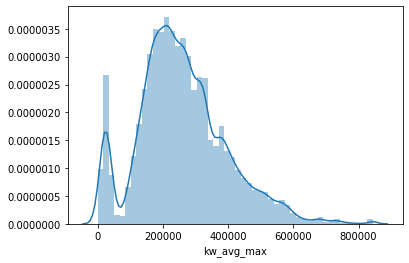

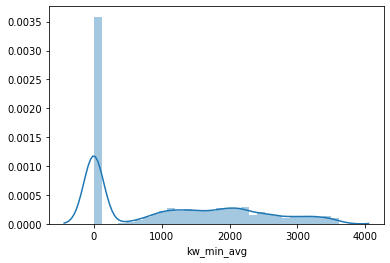

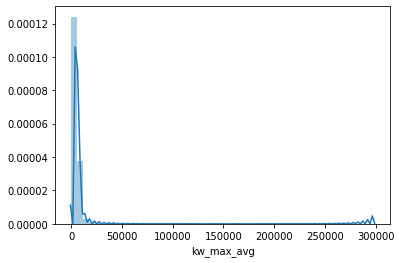

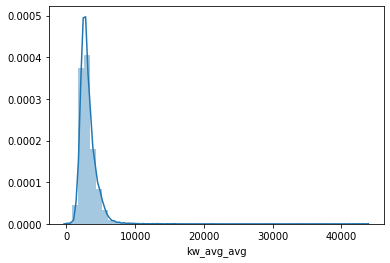

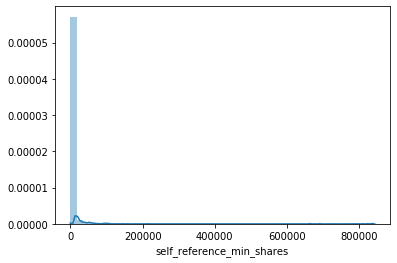

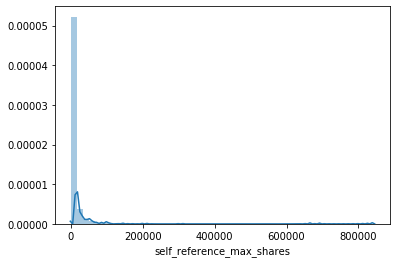

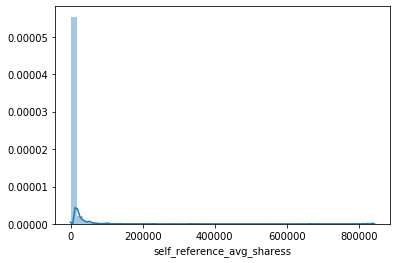

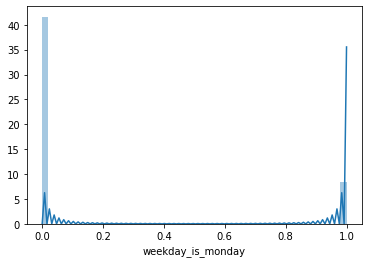

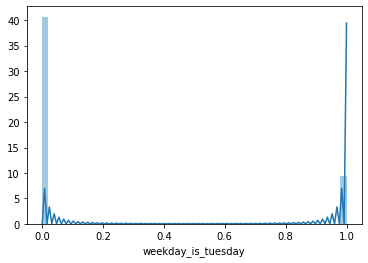

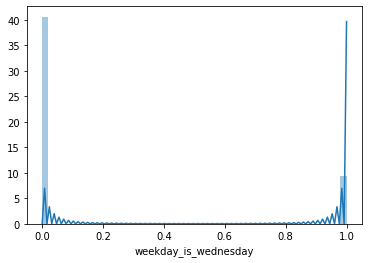

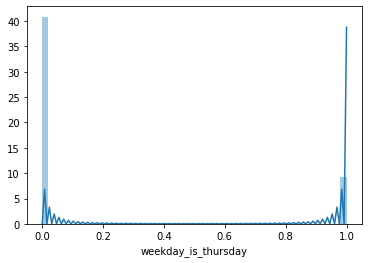

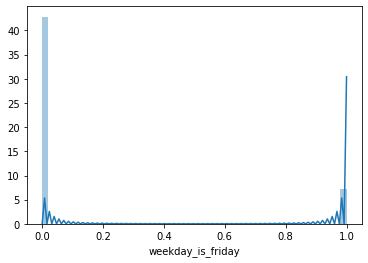

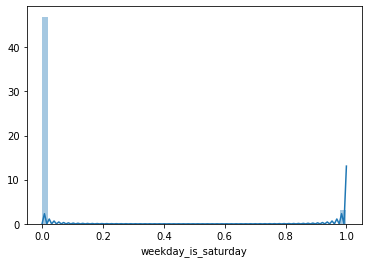

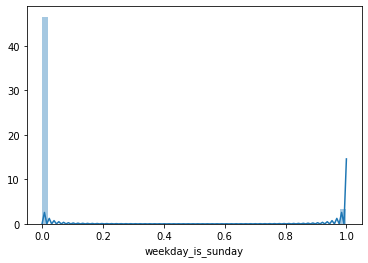

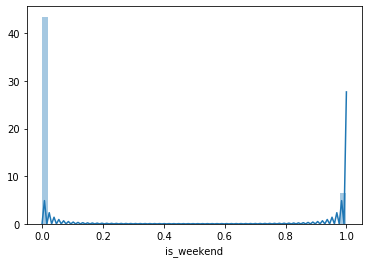

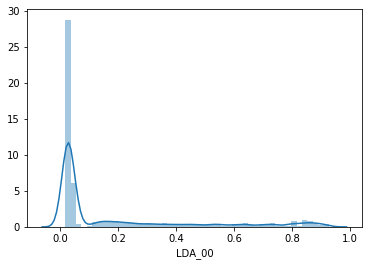

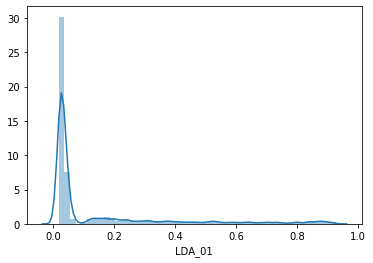

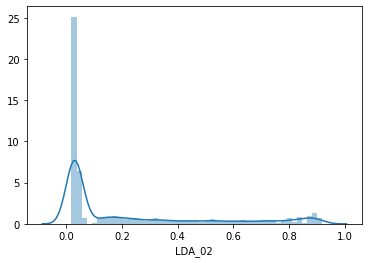

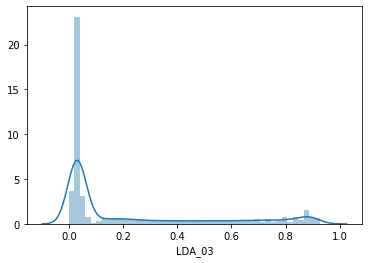

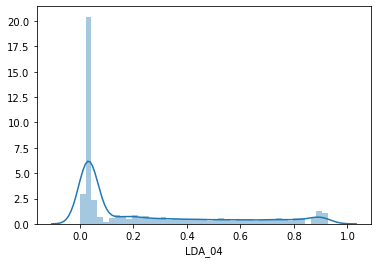

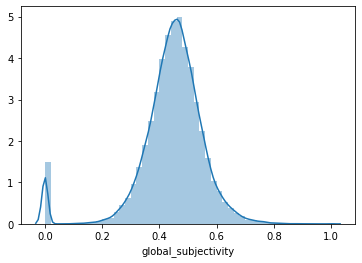

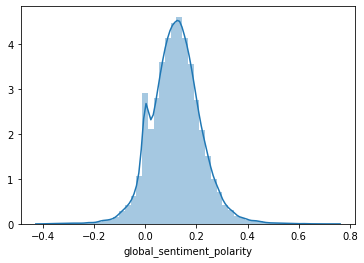

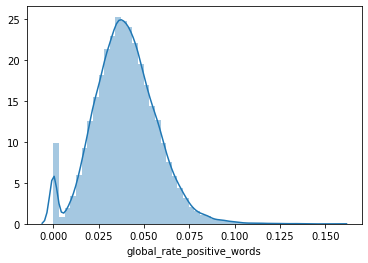

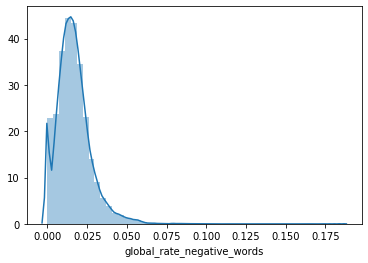

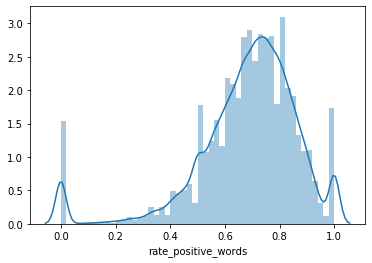

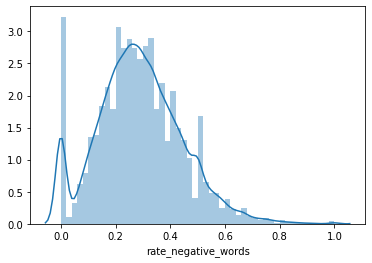

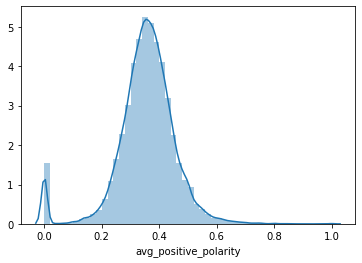

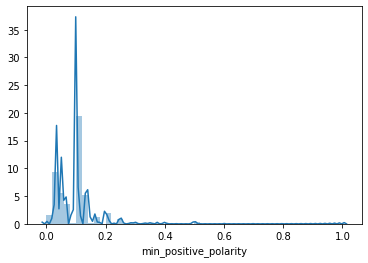

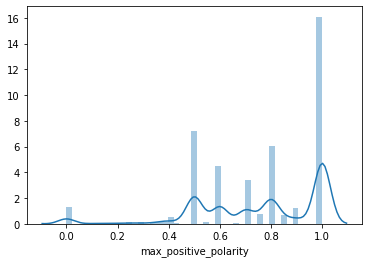

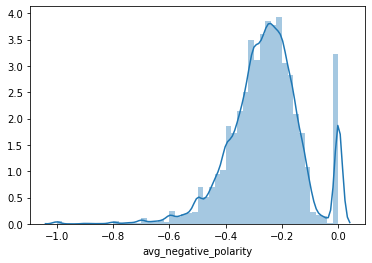

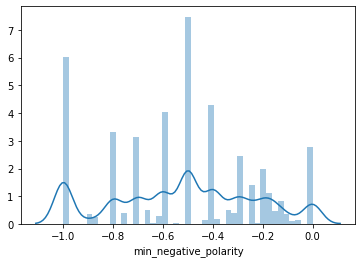

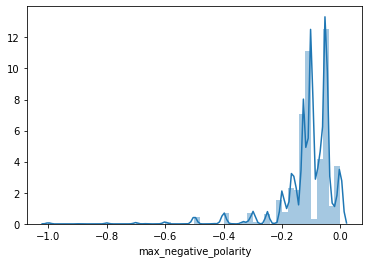

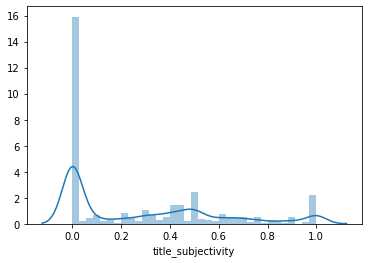

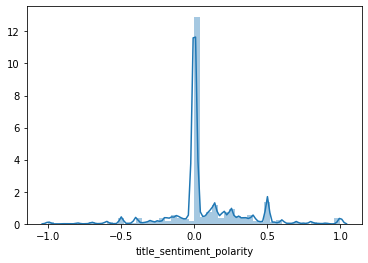

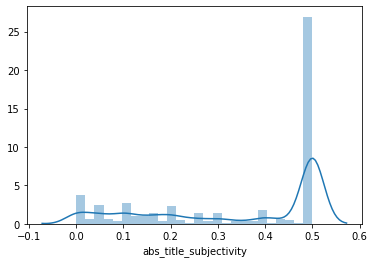

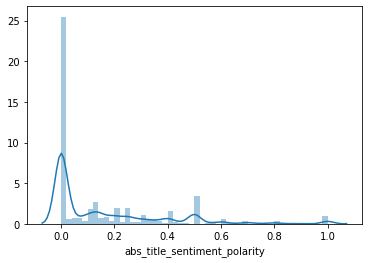

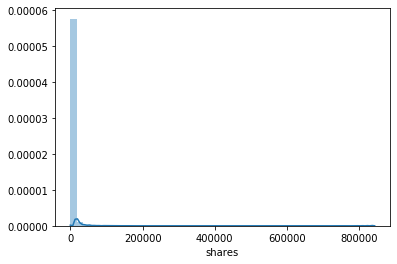

In [15]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

In [144]:
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1)  # with outlier
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

train score  0.5863388181109089
test score 0.586012652742872
accuracy score 0.586012652742872


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
newdata.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [17]:
def outliers_indices(feature):

    mid = newdata[feature].mean()
    sigma = newdata[feature].std()
    return newdata[(newdata[feature] < mid - 3*sigma) | (newdata[feature] > mid + 3*sigma)].index

In [18]:
wrong_vid = outliers_indices('num_videos')
wrong_img = outliers_indices('num_imgs')
wrong_content = outliers_indices('n_tokens_content')
wrong_hrefs = outliers_indices('num_hrefs')
wrong_self_hrefs = outliers_indices('num_self_hrefs')
wrong_kw_max_min = outliers_indices('kw_max_min')
wrong_kw_max_max = outliers_indices('kw_max_max')
wrong_kw_max_avg = outliers_indices('kw_max_avg')
wrong_self_reference = outliers_indices('self_reference_max_shares')

out = set(wrong_vid) | set(wrong_img) | set(wrong_content) |set(wrong_hrefs)|set(wrong_self_hrefs)|set(wrong_kw_max_min)|set(wrong_kw_max_max)|set(wrong_kw_max_avg)|set(wrong_self_reference)
newdata.drop(out,inplace=True)

In [55]:
newdata.shape

(31992, 59)

In [69]:
len(out)

6470

In [57]:
newdata.describe().T

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,31992.0,10.416104,2.116122e+00,3.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,31992.0,507.097868,3.442584e+02,24.000000,253.000000,406.000000,672.000000,1966.000000
n_unique_tokens,31992.0,0.552478,9.660581e-02,0.181818,0.484371,0.547425,0.612538,1.000000
n_non_stop_words,31992.0,1.000000,3.907598e-09,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,31992.0,0.700469,9.278504e-02,0.253112,0.640510,0.698050,0.759342,1.000000
num_hrefs,31992.0,9.875281,7.630671e+00,0.000000,5.000000,8.000000,13.000000,45.000000
num_self_hrefs,31992.0,2.993936,2.441698e+00,0.000000,1.000000,3.000000,4.000000,15.000000
num_imgs,31992.0,3.639941,5.460609e+00,0.000000,1.000000,1.000000,3.000000,29.000000
num_videos,31992.0,0.697487,1.695602e+00,0.000000,0.000000,0.000000,1.000000,13.000000
average_token_length,31992.0,4.690217,2.813141e-01,3.600000,4.500000,4.679922,4.866215,8.041534


In [159]:
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(newdata.shape)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(31992, 59)
train score  0.5992676609806198
test score 0.613044384246718
accuracy score 0.613044384246718


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8)
modelrfp=rfp.fit(X_train,y_train) # from removing of ourlier
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6769118566367993
0.3501545062709699
0.7013962445835339


In [628]:
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
bgp=GradientBoostingClassifier(n_estimators=500)
modelbgp=bgp.fit(X_train,y_train)
ypredbgp=bgp.predict(X_test)
print(accuracy_score(y_test,ypredbgp))
print(cohen_kappa_score(y_test,ypredbgp))
print(f1_score(y_test,ypredbgp))

0.6755574077932903
0.34931451349021647
0.6918052256532067


In [69]:
newdata.shape

(38462, 59)

In [76]:
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(newdata.shape)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(38462, 59)
train score  0.5863388181109089
test score 0.586012652742872
accuracy score 0.586012652742872


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing with outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print(newdata.shape)
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(38462, 59)
train score  0.6577897747874784
test score 0.6511562323745065
accuracy score 0.6511562323745065


In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing and removed outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print(newdata.shape)
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(31992, 59)
train score  0.6678128070018755
test score 0.6587830798082934
accuracy score 0.6587830798082934


In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing without outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

train score  0.6577897747874784
test score 0.6511562323745065
accuracy score 0.6511562323745065


In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)   # with outliers
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

train score  0.5863388181109089
test score 0.586012652742872
accuracy score 0.586012652742872


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model1=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('knn train score ',knn.score(X_train,y_train))
print('knn test score',knn.score(X_test,y_test))
print('knn accuracy score',accuracy_score(y_test,y_pred))

knn train score  0.7386890133354821
knn test score 0.6156232374506486
knn accuracy score 0.6156232374506486


In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model1=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)  # with outlier without scaling
print('knn train score ',knn.score(X_train,y_train))
print('knn test score',knn.score(X_test,y_test))
print('knn accuracy score',accuracy_score(y_test,y_pred))

knn train score  0.7386890133354821
knn test score 0.6156232374506486
knn accuracy score 0.6156232374506486


In [38]:
# we make the groups of data like no of words 
words=newdata.iloc[:,0:5]
words['popularity']=newdata['popularity']
words['average_token_length']=data['average_token_length']
words['num_keywords']=newdata['num_keywords']

In [39]:
words.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,popularity,average_token_length,num_keywords
0,12.0,219.0,0.663594,1.0,0.815385,0,4.680365,5.0
1,9.0,255.0,0.604743,1.0,0.791946,0,4.913725,4.0
2,9.0,211.0,0.575130,1.0,0.663866,1,4.393365,6.0
3,9.0,531.0,0.503788,1.0,0.665635,0,4.404896,7.0
5,10.0,370.0,0.559889,1.0,0.698198,0,4.359459,9.0


C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


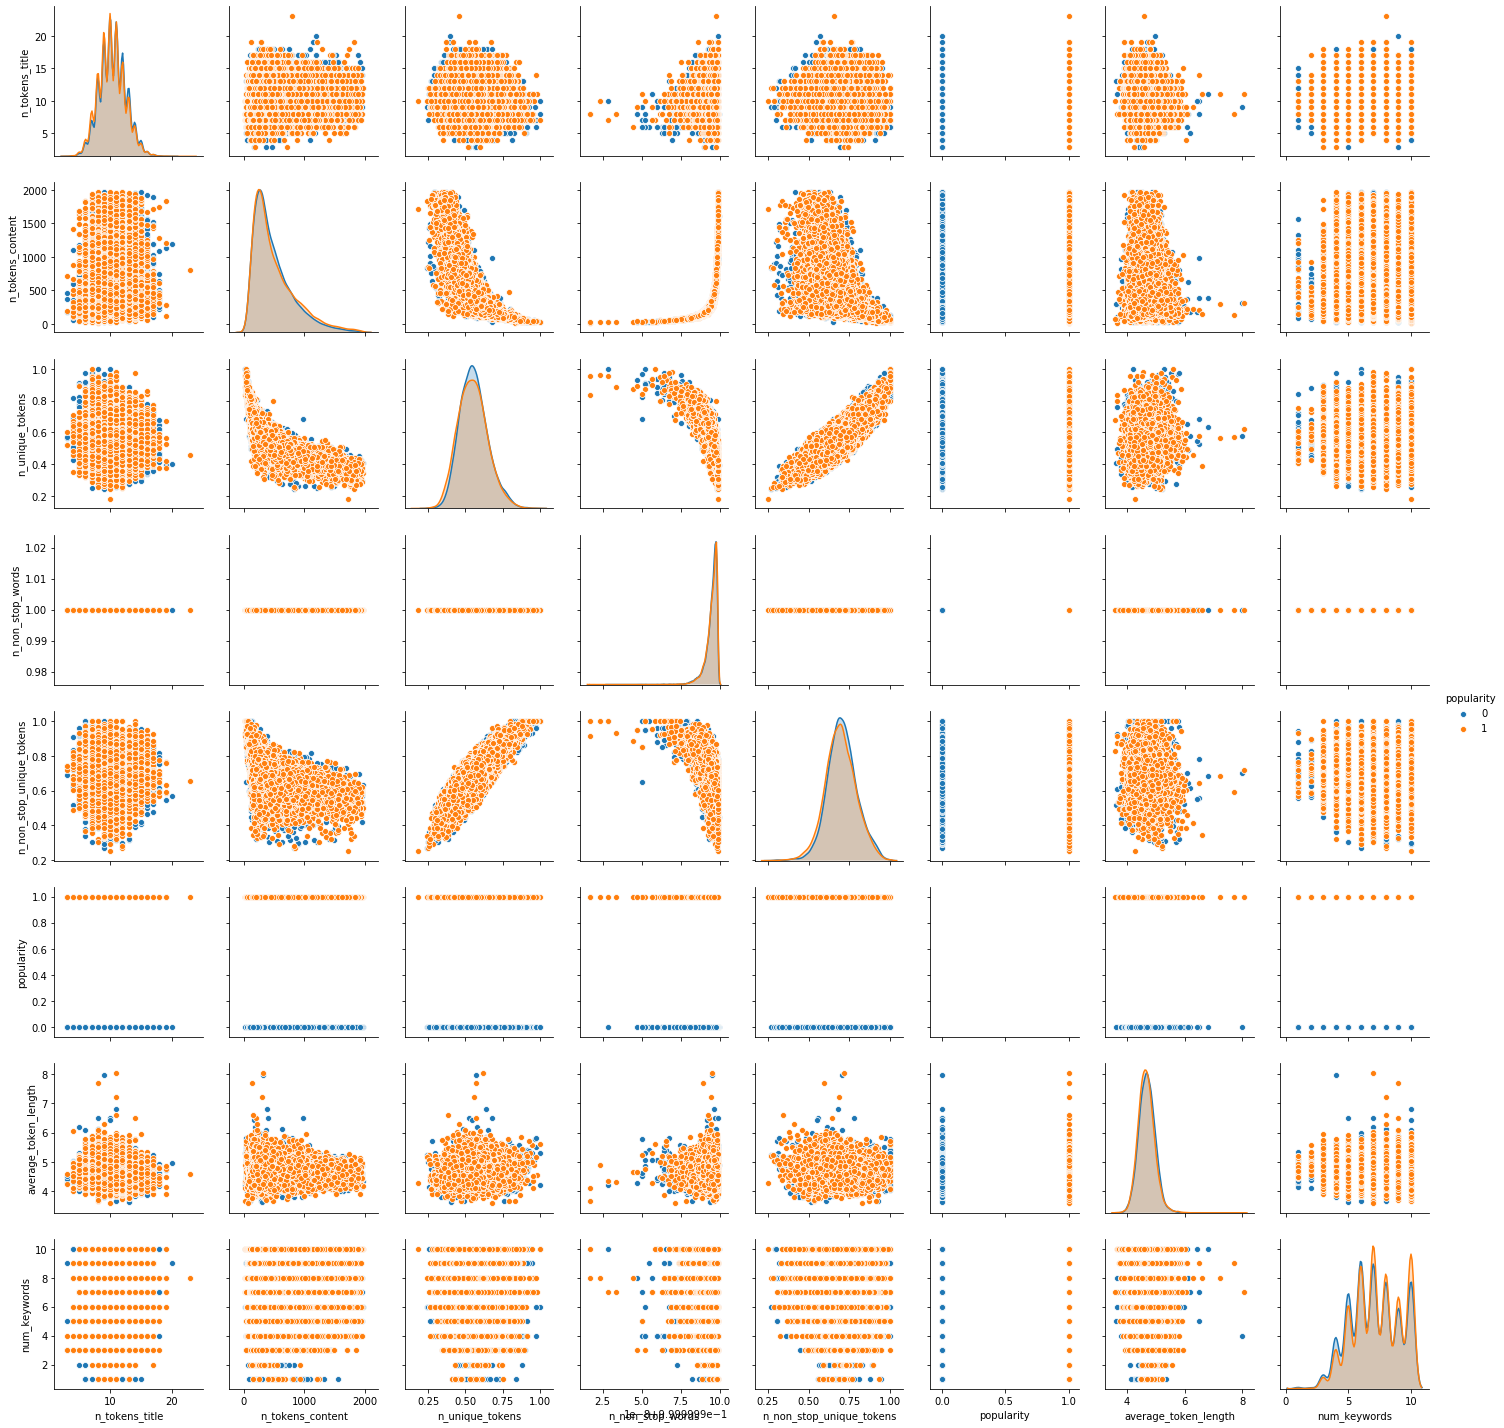

In [40]:
sns.pairplot(words,hue='popularity')

In [19]:
new=newdata.copy()
from sklearn.model_selection import train_test_split
X=new.drop('popularity',axis=1)
y=new['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [566]:
X_train.shape,X_test.shape

((21434, 58), (10558, 58))

In [567]:
scaleXtrain=sc.fit_transform(X_train)
scaleXtest=sc.transform(X_test)

In [568]:
scaleXtrain=pd.DataFrame(scaleXtrain,columns=X_train.columns)
scaleXtest=pd.DataFrame(scaleXtest,columns=X_test.columns)

In [569]:
newdata.shape,new.shape

((31992, 59), (31992, 59))

In [570]:
ldatrain=scaleXtrain.iloc[:,37:42]
ldatest=scaleXtest.iloc[:,37:42] # extracting lda

In [571]:
ldatest.shape,ldatrain.shape

((10558, 5), (21434, 5))

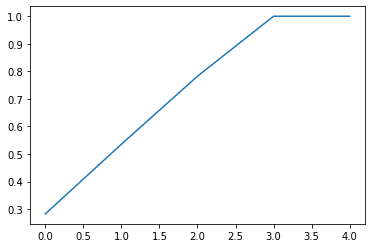

In [572]:
from sklearn.decomposition import PCA
pc=PCA
pca = PCA()

pca.fit(ldatrain)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [573]:
from sklearn.decomposition import PCA
pc=PCA
pca1 = PCA()
pca1 = PCA(n_components=4)
pca1.fit(ldatrain)
ldtrain=pd.DataFrame(pca1.fit_transform(ldatrain),  columns=['ld1', 'ld2','ld3','ld4'])
ldtrain.shape

(21434, 4)

In [574]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.282641  , 0.53555025, 0.78241264, 1.        ])

In [575]:
pca2 = PCA(n_components=4)
pca2.fit(ldatest)
ldtest=pd.DataFrame(pca2.transform(ldatest),  columns=['ld1', 'ld2','ld3','ld4'])
print(ldtest.shape)
print(np.cumsum(pca2.explained_variance_ratio_))

(10558, 4)
[0.28478939 0.53547568 0.78083765 1.        ]


In [576]:
scaleXtrain.drop(columns=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'],axis=1,inplace=True)

In [577]:
scaleXtest.drop(columns=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'],axis=1,inplace=True)

In [578]:
ldtrain.shape,scaleXtrain.shape,ldtest.shape,scaleXtest.shape# ldtrain new 3 components

((21434, 4), (21434, 53), (10558, 4), (10558, 53))

In [579]:
ldntrain=ldtrain.reset_index(drop=True)
X_train=scaleXtrain.reset_index(drop=True)

In [580]:
X_train=pd.concat([X_train,ldntrain],axis=1)

In [581]:
ldntest=ldtest.reset_index(drop=True)
X_test=scaleXtest.reset_index(drop=True)

In [582]:
X_test=pd.concat([X_test,ldntest],axis=1)

In [466]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lo=LogisticRegression(C=1,penalty='l2')
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test) # removing of outlier from kw_min max
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6559954536844099
0.31062404625014006
0.6707162284678151


In [20]:
kwtrain=X_train.iloc[:,17:26]
kwtest=X_test.iloc[:,17:26] # extracting lda

kwtest.shape,kwtrain.shape,X_train.shape,X_test.shape

((10558, 9), (21434, 9), (21434, 58), (10558, 58))

In [21]:
kwtrain.head()

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
39049,-1.0,558.0,179.500000,14000.0,843300.0,203600.000000,1902.548387,3395.063098,2302.897287
5035,4.0,475.0,98.200000,0.0,617900.0,220600.000000,0.000000,4620.785398,2852.693051
23931,-1.0,442.0,150.857143,0.0,843300.0,193888.700000,0.000000,4213.849642,2103.594310
24813,-1.0,899.0,181.571429,1400.0,843300.0,319257.142857,1166.333333,4029.529189,3311.149754
24227,-1.0,539.0,307.500000,0.0,843300.0,185566.666667,0.000000,3594.627004,1947.878339


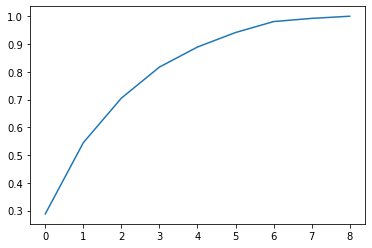

In [585]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(kwtrain)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1 = PCA(n_components=6)
pca1.fit(kwtrain)
kwtrain=pd.DataFrame(pca1.fit_transform(kwtrain),  columns=['kw1', 'kw2','kw3','kw4','kw5','kw6'])
kwtrain.shape

np.cumsum(pca1.explained_variance_ratio_)

array([0.6624346 , 0.88845597, 0.99960206, 0.99989471, 0.99994473,
       0.99999365])

In [587]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1 = PCA(n_components=6)
pca1.fit(kwtrain)
kwtrain=pd.DataFrame(pca1.fit_transform(kwtrain),  columns=['kw1', 'kw2','kw3','kw4','kw5','kw6'])
kwtrain.shape

np.cumsum(pca1.explained_variance_ratio_)

array([0.28800886, 0.54465963, 0.70511835, 0.81692973, 0.88916542,
       0.94135632])

In [588]:
pca2 = PCA(n_components=6)
pca2.fit(kwtest)
kwtest=pd.DataFrame(pca2.transform(kwtest),  columns=['kw1', 'kw2','kw3','kw4','kw5','kw6'])
kwtest.shape
np.cumsum(pca2.explained_variance_ratio_)

array([0.28809515, 0.55025377, 0.71297713, 0.81632696, 0.88658719,
       0.93900125])

In [589]:
X_train.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_

In [590]:
X_train.drop(columns=['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg'],axis=1,inplace=True)

X_test.drop(columns=['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg'],axis=1,inplace=True)



In [591]:
kwtrain.shape,X_train.shape,kwtest.shape,X_test.shape# kwt new 6 components

((21434, 6), (21434, 48), (10558, 6), (10558, 48))

In [592]:
kwtrain=kwtrain.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)

In [593]:
X_train=pd.concat([X_train,kwtrain],axis=1)

In [594]:
kwtest=kwtest.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [595]:
X_test=pd.concat([X_test,kwtest],axis=1)

In [596]:
kwtrain.shape,X_train.shape,kwtest.shape,X_test.shape# kwt new 6 components

((21434, 6), (21434, 54), (10558, 6), (10558, 54))

In [597]:
X_train.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negati

# kw

In [599]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lo=LogisticRegression(C=1)
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test) # removing of outlier from kw_min max
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6484182610342868
0.295608784530204
0.6626681206833879


In [480]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
modelrf=rf.fit(X_train,y_train)
ypredrf=rf.predict(X_test)
print(accuracy_score(y_test,ypredrf))
print(cohen_kappa_score(y_test,ypredrf))

0.6747490054934647
0.3462120438364765


In [603]:
Xadd=pd.concat([X_train,X_test],axis=0,ignore_index=True)
Xadd.shape

(31992, 54)

In [604]:
newdata.shape

(31992, 59)

In [607]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lp=LogisticRegression(C=1,penalty='l2')
modellda=lp.fit(X_train,y_train)
ypredlda=lp.predict(X_test)
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6484182610342868
0.295608784530204
0.6626681206833879


In [505]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8)
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6736820170868931
0.3438947994478062
0.697391304347826


In [608]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
bgp=GradientBoostingClassifier(n_estimators=500)
modelbgp=bgp.fit(X_train,y_train)
ypredbgp=bgp.predict(X_test)
print(accuracy_score(y_test,ypredbgp))
print(cohen_kappa_score(y_test,ypredbgp))
print(f1_score(y_test,ypredbgp))

0.6541011555218792
0.30545449410085623
0.6752045535396656


In [609]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
adb=AdaBoostClassifier(n_estimators=200,learning_rate=1)
modeladb=adb.fit(X_train,y_train)
ypredadb=adb.predict(X_test)
print(accuracy_score(y_test,ypredadb))
print(cohen_kappa_score(y_test,ypredadb))
print(f1_score(y_test,ypredadb))

0.6348740291721917
0.2697749951747235
0.6434187401720469


In [677]:
#predict proba 
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(newdata.shape)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(31992, 59)
train score  0.5992676609806198
test score 0.613044384246718
accuracy score 0.613044384246718


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [690]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing without outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
#predict proba 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(newdata.shape)
from sklearn.metrics import accuracy_score
print('train score ',lr.score(X_train,y_train))
print('test score',lr.score(X_test,y_test))
print('accuracy score',accuracy_score(y_test,ypred))

(31992, 59)
train score  0.6678128070018755
test score 0.6587830798082934
accuracy score 0.6587830798082934


In [691]:
y_pred_prob=lr.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.602669,0.397331
1,0.609462,0.390538
2,0.740193,0.259807
3,0.640901,0.359099
4,0.304113,0.695887


In [706]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=lr.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',
           cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'accuracy :',(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[1,1]+cm2[0,1]+cm2[0,0]),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[   1 4562]
 [   1 5034]] 
 with 5035 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9998013902681231 Specificity:  0.00021915406530791147 accuracy : 0.5245884559283184 



With 0.2 threshold the Confusion Matrix is  
 [[ 153 4410]
 [  38 4997]] 
 with 5150 correct predictions and 38 Type II errors( False Negatives) 

 Sensitivity:  0.9924528301886792 Specificity:  0.03353057199211045 accuracy : 0.5302172346339957 



With 0.3 threshold the Confusion Matrix is  
 [[1102 3461]
 [ 354 4681]] 
 with 5783 correct predictions and 354 Type II errors( False Negatives) 

 Sensitivity:  0.9296921549155909 Specificity:  0.24150777996931844 accuracy : 0.558959984535086 



With 0.4 threshold the Confusion Matrix is  
 [[2104 2459]
 [ 931 4104]] 
 with 6208 correct predictions and 931 Type II errors( False Negatives) 

 Sensitivity:  0.8150943396226416 Specificity:  0.4611001534078457 accuracy : 0.5763624547395785 



Wi

In [707]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=newdata.drop(columns=['popularity'],axis=1) # without outlier with remove of high outliers from kw_max 
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
sc=StandardScaler()
scaleXtrain=sc.fit_transform(X_train) # after sclaing without outlier

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
#predict proba 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8)
modelrfp=rfp.fit(X_train,y_train) # from removing of ourlier
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.675349031048135
0.3466812001205305
0.7013609354034887


In [ ]:
import time
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
fit_rf=RandomForestClassifier()
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators':[200,300,500,600],'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lo=LogisticRegression(C=1,penalty='l2')
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test) # removing of outlier from kw_min max
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6587830798082934
0.31593286266497145
0.6746796463693255


In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score,
lo=LogisticRegression(C=0.0002,penalty='l2')
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test)
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6303816506862192
0.2573983361905714
0.6542992790574996


In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lo=LogisticRegression(C=0.01,penalty='l2')
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test)
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6473021244594849
0.2910941430272215
0.6713384723195515


In [188]:
lo.coef_

array([[-0.0223171 ,  0.01536214, -0.01927456, -0.00136634, -0.02249183,
         0.06442957,  0.00709137,  0.04787781,  0.01692008, -0.01635506,
         0.05236116, -0.00172295, -0.1048319 , -0.0246101 ,  0.11525242,
         0.0796299 , -0.08085413,  0.06192257, -0.01670939, -0.00408105,
        -0.01232933, -0.03254263,  0.00845034,  0.06121596,  0.01516595,
         0.13405967,  0.03843868,  0.02950084,  0.03992677, -0.00186386,
        -0.03641329, -0.04153472, -0.01569136,  0.012963  ,  0.08205434,
         0.05329445,  0.09829081,  0.05649926,  0.0065337 ,  0.00966726,
         0.00816159,  0.01850198, -0.01792523,  0.00200515, -0.02510049,
         0.00536987, -0.00241482, -0.00359224,  0.00278211,  0.01229369,
         0.02523393,  0.01495156,  0.01036829,  0.00187437,  0.11682863,
         0.04327098]])

In [44]:
print(roc_auc_score(y_test,ypredlda))

0.6235671533399367


In [93]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [146]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=6)
modelrf=rf.fit(X_train,y_train)
ypredrf=rf.predict(X_test)
print(accuracy_score(y_test,ypredrf))
print(cohen_kappa_score(y_test,ypredrf))

0.6496521902613274
0.29373741060211533


In [182]:
ad=AdaBoostClassifier(n_estimators=500,)
modelad=ad.fit(X_train,y_train)
ypredad=ad.predict(X_test)
print(accuracy_score(y_test,ypredad))
print(cohen_kappa_score(y_test,ypredad))

0.6402892778534744
0.2815357248066076


With outlier

In [356]:
from sklearn.model_selection import train_test_split
X=dataset.drop(columns=['popularity'],axis=1)
y=dataset['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [357]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [358]:
scaleXtrain=sc.fit_transform(X_train)

In [359]:
X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

In [360]:
scaleXtest=sc.transform(X_test)

In [361]:

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

In [362]:
ldatrain=X_train.iloc[:,37:42]
ldatest=X_test.iloc[:,37:42] # extracting lda

In [363]:
ldatest.shape,ldatrain.shape

((10638, 5), (24821, 5))

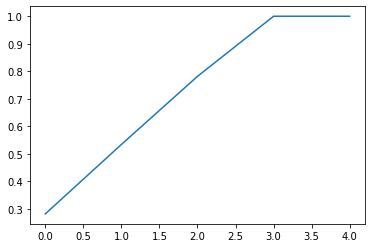

In [364]:
from sklearn.decomposition import PCA
pc=PCA
pca = PCA()

pca.fit(ldatrain)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [365]:
pca = PCA(n_components=3)
pca.fit(ldatrain)
ldtrain=pd.DataFrame(pca.fit_transform(ldatrain),  columns=['ld1', 'ld2', 'ld3'])
ldtrain.shape

(24821, 3)

In [366]:
pca = PCA(n_components=3)
pca.fit(ldatest)
ldtest=pd.DataFrame(pca.transform(ldatest),  columns=['ld1', 'ld2', 'ld3'])
ldtest.shape

(10638, 3)

In [367]:
X_train.drop(columns=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'],axis=1,inplace=True)

In [368]:
X_test.drop(columns=['LDA_00','LDA_01','LDA_02','LDA_03','LDA_04'],axis=1,inplace=True)

In [369]:
ldtrain.shape,X_train.shape,ldtest.shape,X_test.shape# ldtrain new 3 components

((24821, 3), (24821, 53), (10638, 3), (10638, 53))

In [370]:
ldntrain=ldtrain.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)

In [371]:
X_train=pd.concat([X_train,ldntrain],axis=1)

In [372]:
ldntest=ldtest.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [373]:
X_test=pd.concat([X_test,ldntest],axis=1)

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score
lo=LogisticRegression(penalty='l2',C=93)
modellda=lo.fit(X_train,y_train)
ypredlda=lo.predict(X_test)
print(accuracy_score(y_test,ypredlda))  # outlier affects the result
print(cohen_kappa_score(y_test,ypredlda))

0.611769129535627
0.22034855604486858


In [377]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [378]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
modelrf=rf.fit(X_train,y_train)
ypredrf=rf.predict(X_test)
print(accuracy_score(y_test,ypredrf))
print(cohen_kappa_score(y_test,ypredrf))

0.6616845271667606
0.3189134511409192


In [379]:
from sklearn.naive_bayes import GaussianNB

In [380]:
model = GaussianNB()
model.fit(X_train,y_train)
yprednav=model.predict(X_test)
print(accuracy_score(y_test,yprednav))
print(cohen_kappa_score(y_test,yprednav))

0.5893025004700132
0.196338927099298


In [629]:
from statsmodels.api import OLS 
import statsmodels.api as sm

In [631]:
newdata.shape
X=newdata.drop('popularity',axis=1)
y=newdata['popularity']

In [632]:
def back_feature_elem (data_frame,dep_var,col_list):

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,y,X.columns)

C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Ajay singh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Ajay singh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512

In [633]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                31992
Model:                          Logit   Df Residuals:                    31957
Method:                           MLE   Df Model:                           34
Date:                Wed, 29 Jan 2020   Pseudo R-squ.:                  0.1113
Time:                        03:48:03   Log-Likelihood:                -19681.
converged:                       True   LL-Null:                       -22146.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_unique_tokens                  -0.9471      0.155     -6.123      0.000      -1.250      -0.644
num_hrefs                         0.0113      0.002      6.006      0.000       0.008       0.015
num_imgs                          0.0069      0.003      2.502      0.012       0.002       0.012
num_videos                        0.0200      0.008      2.619      0.009       0.005       0.035
num_keywords                      0.0339      0.008      4.233      0.000       0.018       0.050
data_channel_is_entertainment    -0.1509      0.051     -2.978      0.003      -0.250      -0.052
data_channel_is_socmed            1.0848      0.065     16.808      0.000       0.958       1.211
data_channel_is_tech              0.6853      0.051     13.485      0.000       0.586       0.785
data_channel_is_world             0.1919      0.061      3.124      0.002       0.072       0.312
kw_min_min                        0.0020      0.000      5.785      0.000       0.001       0.003
kw_min_max                    -7.579e-07   2.37e-07     -3.198      0.001   -1.22e-06   -2.93e-07
kw_max_max                    -1.472e-06   2.24e-07     -6.568      0.000   -1.91e-06   -1.03e-06
kw_avg_max                    -5.057e-07    1.7e-07     -2.981      0.003   -8.38e-07   -1.73e-07
kw_min_avg                       -0.0001   1.72e-05     -7.231      0.000      -0.000   -9.07e-05
kw_max_avg                       -0.0001   1.01e-05     -9.961      0.000      -0.000   -8.11e-05
kw_avg_avg                        0.0008    3.8e-05     22.199      0.000       0.001       0.001
self_reference_avg_sharess     2.038e-05   1.51e-06     13.498      0.000    1.74e-05    2.33e-05
weekday_is_tuesday               -0.1027      0.034     -2.995      0.003      -0.170      -0.035
weekday_is_wednesday             -0.1282      0.034     -3.732      0.000      -0.195      -0.061
weekday_is_friday                 0.1576      0.037      4.216      0.000       0.084       0.231
weekday_is_sunday                -0.2140      0.073     -2.928      0.003      -0.357      -0.071
is_weekend                        1.0053      0.058     17.301      0.000       0.891       1.119
LDA_00                           -0.8943      0.267     -3.349      0.001      -1.418      -0.371
LDA_01                           -1.8698      0.284     -6.583      0.000      -2.426      -1.313
LDA_02                           -2.0309      0.273     -7.439      0.000      -2.566      -1.496
LDA_03                           -1.9688      0.285     -6.905      0.000      -2.528      -1.410
LDA_04                           -1.4262      0.274     -5.201      0.000      -1.964      -0.889
global_subjectivity               0.8142      0.159      5.122      0.000       0.503       1.126
global_rate_positive_words       -3.5870      1.352     -2.652      0.008      -6.238      -0.936
global_rate_negative_words        7.0421      2.833      2.486      0.013       1.490      12.594
rate_po

In [637]:
newdata.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [21]:
from sklearn.model_selection import train_test_split
X=newdata.drop(columns='popularity',axis=1)
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score
lp=RandomForestClassifier()
modelp=lp.fit(X_train,y_train)
ypredp=lp.predict(X_test)
print(accuracy_score(y_test,ypredp))
print(cohen_kappa_score(y_test,ypredp))

0.6652222896264841
0.32575437533953233


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score
lp=LogisticRegression()
modelp=lp.fit(X_train,y_train)
ypredp=lp.predict(X_test)
print(accuracy_score(y_test,ypredp))
print(cohen_kappa_score(y_test,ypredp))

0.5946606504982139
0.1844018117064503


C:\Users\Ajay singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [646]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [651]:
cl=LinearDiscriminantAnalysis()

In [652]:

from sklearn.metrics import accuracy_score,cohen_kappa_score
modelp=cl.fit(X_train,y_train)
ypredp=cl.predict(X_test)
print(accuracy_score(y_test,ypredp))
print(cohen_kappa_score(y_test,ypredp))

0.6539904146697229
0.30636734076751837


In [47]:
newdata['n_tokens_content'].max()

1966.0

Text(0.5, 1.0, 'popularity vs rate of unique words')

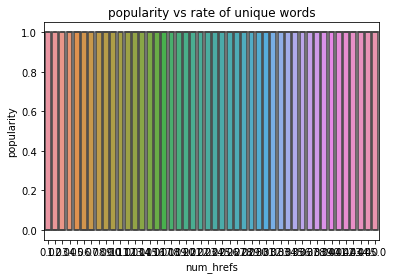

In [48]:
sns.boxplot(newdata['num_hrefs'],newdata['popularity'])
plt.title('popularity vs rate of unique words')

In [52]:
newdata['num_imgs'].max()

29.0

In [424]:
RFE

sklearn.feature_selection._rfe.RFE

In [23]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lp,n_features_to_select=30)
selct=rfe.fit(X,y)

In [31]:
kf=pd.DataFrame(selct.ranking_,index=X.columns)
kf[kf[0]==1].index

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'average_token_length',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity'],
      dtype='object')

In [382]:
selct.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LogisticRegression(C=0.0002, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)>

In [371]:
X.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [36]:
newX=X[['n_tokens_title', 'n_tokens_content','num_hrefs',
       'num_self_hrefs', 'num_imgs','num_keywords','data_channel_is_entertainment','data_channel_is_socmed'
        ,'data_channel_is_tech','data_channel_is_world', 'kw_min_min','kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','weekday_is_tuesday',
       'weekday_is_wednesday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02','LDA_04','title_sentiment_polarity']]

NameError: name 'X' is not defined

In [418]:
from sklearn.model_selection import train_test_split
newX=newdata.drop(columns=['popularity'],axis=1)
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [419]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [420]:
scaleXtrain=sc.fit_transform(X_train)

In [421]:
X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

In [422]:
scaleXtest=sc.transform(X_test)

In [423]:
X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lp=LogisticRegression(C=0.0002,penalty='l2')
modellda=lp.fit(X_train,y_train)
ypredlda=lp.predict(X_test)
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6515322429028013
0.2970596268195893
0.6851804670912951


In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier()
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6666666666666666
0.3297733936457091
0.6903597624869018


In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy')
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6745628877608573
0.3451760371353736
0.6995834779590421


In [396]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8)
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6647866140251927
0.3241308973442295
0.6958894763772814


In [394]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
bgp=GradientBoostingClassifier(n_estimators=500)
modelbgp=bgp.fit(X_train,y_train)
ypredbgp=bgp.predict(X_test)
print(accuracy_score(y_test,ypredbgp))
print(cohen_kappa_score(y_test,ypredbgp))
print(f1_score(y_test,ypredbgp))

0.6724948298552359
0.34221959776688127
0.6928231352495151


In [428]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
adb=AdaBoostClassifier()
modeladb=adb.fit(X_train,y_train)
ypredadb=adb.predict(X_test)
print(accuracy_score(y_test,ypredadb))
print(cohen_kappa_score(y_test,ypredadb))
print(f1_score(y_test,ypredadb))

0.6645046061289717
0.32624601647424867
0.6850233871679464


In [435]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
adb=AdaBoostClassifier(n_estimators=200,learning_rate=1)
modeladb=adb.fit(X_train,y_train)
ypredadb=adb.predict(X_test)
print(accuracy_score(y_test,ypredadb))
print(cohen_kappa_score(y_test,ypredadb))
print(f1_score(y_test,ypredadb))

0.6617785297988343
0.3208600889798615
0.6820993108323026


In [436]:
from sklearn.ensemble import VotingClassifier

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lp', lp), ('rfp', rfp), ('bgp', bgp)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
ypredvot=eclf1.predict(X_test)
print(accuracy_score(y_test,ypredvot))
print(cohen_kappa_score(y_test,ypredvot))
print(f1_score(y_test,ypredvot))

0.6736228614401203
0.34280838765219535
0.7005864091065884


Apply statistical test 

In [20]:
newdata.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855,0


In [52]:
anovadata=statdata.drop('popularity',axis=1)

In [ ]:
# normal with rfe columns
'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'average_token_length',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity'

In [22]:
newX=newdata[['n_tokens_title', 'n_tokens_content','num_hrefs',
       'num_self_hrefs', 'num_imgs','num_keywords','data_channel_is_entertainment','data_channel_is_socmed'
        ,'data_channel_is_tech','data_channel_is_world', 'kw_min_min','kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','weekday_is_tuesday',
       'weekday_is_wednesday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02','LDA_04']]

from sklearn.model_selection import train_test_split
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaleXtrain=sc.fit_transform(X_train)

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
lp=LogisticRegression(C=0.0002,penalty='l2')
modellda=lp.fit(X_train,y_train)
ypredlda=lp.predict(X_test)
print(accuracy_score(y_test,ypredlda))
print(cohen_kappa_score(y_test,ypredlda))
print(f1_score(y_test,ypredlda))

0.6547197332777662
0.30553970113103435
0.6807936813716047


In [23]:

newX=newdata[['n_tokens_title', 'n_tokens_content','num_hrefs',
       'num_self_hrefs', 'num_imgs','num_keywords','data_channel_is_entertainment','data_channel_is_socmed'
        ,'data_channel_is_tech','data_channel_is_world', 'kw_min_min','kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','weekday_is_tuesday',
       'weekday_is_wednesday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02','LDA_04']]

from sklearn.model_selection import train_test_split
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaleXtrain=sc.fit_transform(X_train)

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500)
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6814961450302146
0.36007419026100373
0.7025975289425042


In [32]:

newX=newdata[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'average_token_length',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity']]

from sklearn.model_selection import train_test_split
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaleXtrain=sc.fit_transform(X_train)

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=500)
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6562093768957449
0.3067958660905151
0.6872684272763107


In [24]:

newX=newdata[['n_tokens_title', 'n_tokens_content','num_hrefs',
       'num_self_hrefs', 'num_imgs','num_keywords','data_channel_is_entertainment','data_channel_is_socmed'
        ,'data_channel_is_tech','data_channel_is_world', 'kw_min_min','kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','weekday_is_tuesday',
       'weekday_is_wednesday','weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02','LDA_04']]

from sklearn.model_selection import train_test_split
y=newdata['popularity']
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaleXtrain=sc.fit_transform(X_train)

X_train=pd.DataFrame(scaleXtrain, columns=list(X_train))

scaleXtest=sc.transform(X_test)

X_test=pd.DataFrame(scaleXtest, columns=list(X_train))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,roc_auc_score
rfp=RandomForestClassifier(n_estimators=800,criterion='entropy')
modelrfp=rfp.fit(X_train,y_train)
ypredrfp=rfp.predict(X_test)
print(accuracy_score(y_test,ypredrfp))
print(cohen_kappa_score(y_test,ypredrfp))
print(f1_score(y_test,ypredrfp))

0.6804542613044384
0.3584167827000416
0.6996964652893372


In [27]:
newX.shape

(31992, 30)

In [29]:
newdata.shape

(31992, 59)

In [30]:
data.shape

(39644, 59)